---
<a name = Section1></a>
# **1. Introduction**
---

**PROJECT DESCRIPTION:**
============================

See https://projects.insaid.co/capstone2/index.php


# Your client for this project is the HR Department at a software company.


   1. They want to try a new initiative to retain employees.
   2. The idea is to use data to predict whether an employee is likely to leave.
   3. Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
   4. They only want to deal with the data that is related to permanent employees.
   
   
## Current Practice

    Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

## This suffers from the following problems:

    1. This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the            skill of the interviewer.
    2. The second problem is these insights can't be aggregated and interlaced across all employees who have left.
    3. The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.



![image.png](attachment:image.png)



## Problem Statement
**====================================================================**


The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

##### ***department_data***

This dataset contains information about each department. The schema of the dataset is as follows:

   1. **dept_id** – Unique Department Code
   2. **dept_name** – Name of the Department
   3. **dept_head** – Name of the Head of the Department

##### ***employee_details_data***

This dataset consists of **Employee ID, their Age, Gender and Marital Status**. The schema of this dataset is as follows:

   1. **employee_id** – Unique ID Number for each employee
   2. **age** – Age of the employee
   3. **gender** – Gender of the employee
   4. **marital_status** – Marital Status of the employee

##### ***employee_data***

This dataset consists of each employee’s **Administrative Information, Workload Information, Mutual Evaluation Information and Status**.

##### **Target variable**

   1. **status** – Current employment status (Employed / Left)
    
##### **Administrative information**

   1. **department** – Department to which the employees belong(ed) to
   2. **salary** – Salary level with respect to rest of their department
   3. **tenure** – Number of years at the company
   4. **recently_promoted** – Was the employee promoted in the last 3 years?
   5. **employee_id** – Unique ID Number for each employee
    
##### **Workload information**

   1. **n_projects** – Number of projects employee has worked on
   2. **avg_monthly_hrs** – Average number of hours worked per month
    
##### **Mutual evaluation information**

   1. **satisfaction** – Score for employee’s satisfaction with the company (higher is better)
   2. **last_evaluation** – Score for most recent evaluation of employee (higher is better)
   3. **filed_complaint** – Has the employee filed a formal complaint in the last 3 years?


---
<a name = Section2></a>
# **2. Installing and importing libraries**
---



<a name = Section21></a>
### **2.1 Installing Libraries**

1.   Restart Runtime (in Colab it is menu -> Runtime -> Restart Runtime)
2.   Run the below steps


In [1]:
#!pip install -q datascience                   # Package that is required by pandas profiling
#!pip install -q pandas-profiling              # Library to generate basic statistics about data

In [2]:
#!pip install -q --upgrade pandas-profiling

In [3]:
!pip install mysql-connector-python ## DB Connection ##

     |████████████████████████████████| 25.2 MB 1.6 MB/s 


3.   Restart Runtime again 
4.   Run step 2 again
5.   Run the code below (to install the other libraries)

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.preprocessing import RobustScaler                      # to scale the data based on their inter-quartile range
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section3></a>
# **3. Loading and Analyzing the Raw Data**
---



<a name = Section31></a>
### **3.1 Loading Training data**

In [5]:
#------ DB Connection ------
import mysql.connector
mydb = mysql.connector.connect(
 user='student', password='student',
 host='cpanel.insaid.co',
 database='Capstone2')

mycursor = mydb.cursor()

In [6]:
# --- Function get table data as a data frame ---
def getTableDataAsDataFrame(dbCursor, tableName):

  ## Get the Columns  of the table
  dbCursor.execute("show columns from " + tableName)
  cols_result = dbCursor.fetchall()
  cols_df = pd.DataFrame(cols_result)
  cols = cols_df.iloc[:, 0]

  ## Then, get the data stored into a DataFrame
  dbCursor.execute("select * from " + tableName)
  table_data_result = dbCursor.fetchall()
  table_data_df = pd.DataFrame(table_data_result, columns = cols)
  
  ## return the Table data as a DataFrame
  return table_data_df


In [7]:
# === TABLES of the DATABASE ===

# Department Table
department_data_df = getTableDataAsDataFrame(mycursor, 'department_data')

display(department_data_df.shape)
display(department_data_df.head(department_data_df.shape[0]))

(11, 3)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [8]:
department_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [9]:
department_data_df.describe(include='all')

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-IT,IT,Henry Adey
freq,1,1,1



**department_data** table have 11 records and 3 columns.

All 3 columns are object type and No **Null** values
 

In [10]:
# Employee Details table
employee_details_data_df = getTableDataAsDataFrame(mycursor, 'employee_details_data')
display(employee_details_data_df.head())
display(employee_details_data_df.shape)

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


(14245, 4)

In [11]:
employee_details_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [12]:
employee_details_data_df.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.00000,14245.00000,14245,14245
unique,NaN,NaN,2,2
top,NaN,NaN,Male,Unmarried
freq,NaN,NaN,9382,7283
mean,112123.05054,32.88993,NaN,NaN
std,8500.45734,9.97083,NaN,NaN
min,100101.00000,22.00000,NaN,NaN
25%,105775.00000,24.00000,NaN,NaN
50%,111298.00000,29.00000,NaN,NaN
75%,116658.00000,41.00000,NaN,NaN



**employee_details_data** table have 14245 records and 4 columns.

2 are Integer columns and 2 are categorical.

There is No **Null** values
 

In [13]:
# Employee data
### MAIN TABLE, Has most of the Features required for the model ###
employee_data_df = getTableDataAsDataFrame(mycursor, 'employee_data')
display(employee_data_df.head(10))
display(employee_data_df.shape)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.86684,6,NaN,medium,0.13442,Left,4.00,124467
1,134.00,None,None,0.55572,2,NaN,low,0.51104,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47408,2,NaN,medium,0.40510,Left,3.00,126150
3,256.00,D00-SP,None,0.96136,6,NaN,low,0.15297,Left,4.00,125346
4,146.00,D00-SS,None,0.50735,2,NaN,medium,0.43484,Left,3.00,113707
5,135.00,D00-MT,None,0.48218,2,NaN,low,0.38155,Left,3.00,121685
6,270.00,D00-PD,None,0.86709,6,NaN,low,0.17258,Left,4.00,119912
7,244.00,D00-IT,None,0.92620,6,NaN,medium,0.06187,Left,5.00,112868
8,289.00,D00-IT,None,0.92986,7,NaN,low,0.16174,Left,4.00,122314
9,281.00,D00-SS,None,0.90797,6,NaN,medium,0.10575,Left,4.00,122394


(14150, 11)

In [14]:
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  object 
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  object 
 10  employee_id        14150 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


In [15]:
employee_data_df.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,14150,13443,2046,12663.00000,14150.00000,297.00000,14150,14000.00000,14150,14000,14150.00000
unique,249,12,1,NaN,NaN,NaN,3,NaN,2,8,NaN
top,135.00,D00-SS,1.00,NaN,NaN,NaN,low,NaN,Employed,3.00,NaN
freq,144,3905,2046,NaN,NaN,NaN,6906,NaN,10784,6018,NaN
mean,NaN,NaN,NaN,0.71840,3.77830,1.00000,NaN,0.62121,NaN,NaN,112080.75025
std,NaN,NaN,NaN,0.17311,1.25016,0.00000,NaN,0.25048,NaN,NaN,8748.20286
min,NaN,NaN,NaN,0.31617,1.00000,1.00000,NaN,0.04006,NaN,NaN,0.00000
25%,NaN,NaN,NaN,0.56371,3.00000,1.00000,NaN,0.45036,NaN,NaN,105772.50000
50%,NaN,NaN,NaN,0.72473,4.00000,1.00000,NaN,0.65239,NaN,NaN,111291.50000
75%,NaN,NaN,NaN,0.87141,5.00000,1.00000,NaN,0.82493,NaN,NaN,116650.75000


<a name = Section32></a>
### **3.2 Initial Observations**

Departments from the master table department_data, that do not appear in the employee_data table

In [16]:
## ANTI JOIN ##
# Departments from the master table department_data, that do not appear in the employee_data table

sql = """
        (SELECT dd.dept_id as dd_dept_id, dept_name, dept_head,
                avg_monthly_hrs,  department, 	filed_complaint, 	last_evaluation, 	
                n_projects, 	recently_promoted, 	salary, 	satisfaction,	tenure, status
        FROM department_data dd 
        LEFT JOIN employee_data ed 
        ON dd.dept_id = ed.department 
        WHERE ed.department IS NULL)
      """

## Columns
cols = ['dd_dept_id', 'dept_name', 'dept_head', 'avg_monthly_hrs',  'department', 	'filed_complaint', 	'last_evaluation', 'n_projects', 	'recently_promoted', 	'salary', 	'satisfaction',	'tenure', 'status']
mycursor.execute(sql)
result = mycursor.fetchall()
employeeRawData_df = pd.DataFrame(result, columns = cols)
display(employeeRawData_df.head())
display(employeeRawData_df.shape)

,dd_dept_id,dept_name,dept_head,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status


(0, 13)

It seems that there are no such entries.
So, ALL departments have entries in employee_data table

Employee_IDs from the master table employee_details_data, that do not appear in the employee_data table

In [17]:
## ANTI JOIN
# Employee_IDs from the master table employee_details_data, that do not appear in the employee_data table

sql = """
        (SELECT edd.employee_id as edd_employee_id, age, gender, marital_status,
                avg_monthly_hrs,  department, 	filed_complaint, 	last_evaluation, 	
                n_projects, 	recently_promoted, 	salary, 	satisfaction,	tenure, status
        FROM employee_details_data edd 
        LEFT JOIN employee_data ed 
        ON edd.employee_id = ed.employee_id 
        WHERE ed.employee_id IS NULL)
      """

## Columns
cols = ['edd_employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',  'department', 	'filed_complaint', 	'last_evaluation', 'n_projects', 	'recently_promoted', 	'salary', 	'satisfaction',	'tenure', 'status']
mycursor.execute(sql)
result = mycursor.fetchall()
employeesAbsentInEmployeeData_df = pd.DataFrame(result, columns = cols)
display(employeesAbsentInEmployeeData_df.head())
display(employeesAbsentInEmployeeData_df.shape)

,edd_employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
0,102113,25,Female,Unmarried,None,None,None,None,None,None,None,None,None,None
1,116853,27,Male,Unmarried,None,None,None,None,None,None,None,None,None,None
2,115767,29,Male,Unmarried,None,None,None,None,None,None,None,None,None,None
3,103805,23,Male,Unmarried,None,None,None,None,None,None,None,None,None,None
4,102998,27,Male,Unmarried,None,None,None,None,None,None,None,None,None,None


(129, 14)

It seems that there are 129 such entries.
These have details such as emp_id, age, gender, marital_status, but not the other fields such as satisfacion score, last_evaluation score, salary etc. Basically vast majority of probable predictors are not there.
So, they won't contribute much to final prediction.

**We will eventually scrap these 129 entries**

Employees in employee_data table that do Not have department ids

In [18]:
# ANTI JOIN

sql = """
        (SELECT ed.department as ed_dept_id,
                employee_id, 
                avg_monthly_hrs,  filed_complaint, 	last_evaluation, 	
                n_projects, 	recently_promoted, 	salary, 	satisfaction,	tenure, status
        FROM employee_data ed 
        WHERE ed.department IS NULL)
      """

## Columns
cols = ['ed_dept_id','employee_id', 'avg_monthly_hrs',  'filed_complaint', 	'last_evaluation', 'n_projects', 	'recently_promoted', 	'salary', 	'satisfaction',	'tenure', 'status']
mycursor.execute(sql)
result = mycursor.fetchall()
employeeRawData_df = pd.DataFrame(result, columns = cols)
display(employeeRawData_df.head())
display(employeeRawData_df.shape)

,ed_dept_id,employee_id,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
0,None,124467,246.00,None,0.86684,6,NaN,medium,0.13442,4.00,Left
1,None,112210,134.00,None,0.55572,2,NaN,low,0.51104,3.00,Left
2,None,127792,155.00,None,0.46460,2,NaN,medium,0.41445,3.00,Left
3,None,128509,156.00,None,NaN,2,NaN,medium,0.46575,3.00,Left
4,None,125077,233.00,None,0.96538,5,NaN,medium,0.96231,5.00,Left


(707, 11)

There are 707 such entries.
That's okay, because data in the other fields of employee_data are there.
We'll come to know from EDA how much weightage does department hold.
Based on that we'll know whether to keep or scrap this

Employees which have departments that don't exist in department master table !

In [19]:
# ANTI JOIN

sql = """
        (SELECT ed.department as ed_dept_id, dept_id, dept_name, dept_head,
                employee_id, 
                avg_monthly_hrs,  department, 	filed_complaint, 	last_evaluation, 	
                n_projects, 	recently_promoted, 	salary, 	satisfaction,	tenure, status
        FROM employee_data ed 
        LEFT JOIN department_data dd 
        ON ed.department = dd.dept_id
        WHERE dd.dept_id IS NULL AND ed.department IS NOT NULL)
      """

## Columns
cols = ['ed_dept_id', 'dept_id', 'dept_name', 'dept_head', 'employee_id', 'avg_monthly_hrs',  'department', 	'filed_complaint', 	'last_evaluation', 'n_projects', 	'recently_promoted', 	'salary', 	'satisfaction',	'tenure', 'status']
mycursor.execute(sql)
result = mycursor.fetchall()
employeeRawData_df = pd.DataFrame(result, columns = cols)
display(employeeRawData_df.head())
display(employeeRawData_df.shape)

,ed_dept_id,dept_id,dept_name,dept_head,employee_id,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
0,-IT,None,None,None,126341,137.00,-IT,None,0.54322,2,NaN,medium,0.44207,3.00,Left
1,-IT,None,None,None,117187,262.00,-IT,None,0.90125,5,NaN,low,0.71789,5.00,Left
2,-IT,None,None,None,124194,134.00,-IT,None,0.50834,2,NaN,medium,0.45638,3.00,Left
3,-IT,None,None,None,119515,267.00,-IT,None,0.78536,5,NaN,low,0.92700,5.00,Left
4,-IT,None,None,None,119346,127.00,-IT,None,0.55991,2,NaN,medium,0.44003,3.00,Left


(207, 15)

There are 207 such entries.
And all have **"-IT"**
However, this "-IT" seems like a typo.
This has ***to be replaced*** by the only match from department_data, **"D00-IT"**


Employees that have no employee_id

In [20]:
# ANTI JOIN

sql = """
        (SELECT employee_id,
                avg_monthly_hrs,  department, 	filed_complaint, 	last_evaluation, 	
                n_projects, 	recently_promoted, 	salary, 	satisfaction,	tenure, status
        FROM employee_data ed 
        WHERE ed.employee_id IS NULL)
      """

## Columns
cols = ['employee_id','avg_monthly_hrs',  'department', 	'filed_complaint', 	'last_evaluation', 'n_projects', 	'recently_promoted', 	'salary', 	'satisfaction',	'tenure', 'status']
mycursor.execute(sql)
result = mycursor.fetchall()
employeeRawData_df = pd.DataFrame(result, columns = cols)
display(employeeRawData_df.head())
display(employeeRawData_df.shape)

,employee_id,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status


(0, 11)

Seems like, all employees have employee_ids

Employees in employee_data table that have ids which don't exist in the master employee table of employee_details_data !

In [21]:
## ANTI JOIN
# Employees in employee_data table that have ids which don't exist in the master employee table of employee_details_data !

sql = """
        (SELECT ed.employee_id as ed_employee_id, 
                edd.employee_id as edd_employee_id, age, gender, marital_status,
                avg_monthly_hrs,  department, 	filed_complaint, 	last_evaluation, 	
                n_projects, 	recently_promoted, 	salary, 	satisfaction,	tenure, status
        FROM employee_data ed 
        LEFT JOIN employee_details_data edd 
        ON ed.employee_id = edd.employee_id
        WHERE edd.employee_id IS NULL)
      """

## Columns
cols = ['ed_employee_id', 'edd_employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',  'department', 	'filed_complaint', 	'last_evaluation', 'n_projects', 	'recently_promoted', 	'salary', 	'satisfaction',	'tenure', 'status']
mycursor.execute(sql)
result = mycursor.fetchall()
employeeRawData_df = pd.DataFrame(result, columns = cols)
display(employeeRawData_df.head(20))
display(employeeRawData_df.shape)

,ed_employee_id,edd_employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
0,0,None,None,None,None,284.00,D00-SS,None,0.85270,6,None,low,0.06917,4.00,Left
1,0,None,None,None,None,264.00,D00-ENG,None,0.77455,6,None,low,0.11097,4.00,Left
2,0,None,None,None,None,129.00,D00-SP,None,0.40266,2,None,medium,0.43736,3.00,Left
3,0,None,None,None,None,167.00,None,None,0.88005,5,None,low,0.68214,3.00,Employed
4,0,None,None,None,None,259.00,D00-ENG,None,0.50588,5,None,low,0.63105,4.00,Employed


(5, 15)

Looks like there are 5 entries in employee_data table, that have employee_ids ('0'), that don't belong in the master employee_details_data table. Although, they have entries in the other fields, such as filed_complaint, tenure, etc.

5 is << 14k+ records, so they won't cause much trouble. Also, what values can we put in employee_id to fill those NAs ? There is none.

**We may scrap these 5 entries with dud employee_ids**

<a name = Section33></a>
### **OBSERVATIONS in a gist**:
====================================

*   There are only **5 entries in employee_data that have employee_id = '0'**. We can eventually **scrap** them off.
***Infact they'll get excluded on taking an INNER JOIN of employee_data, and employee_details_data**


*   **All employees have a valid, non null employee_id**

*   There are **207 entries** in employee_data which have department as **"-IT"**. That is a typo and needs to be replaced by **"D00-IT"**

*   There are **707 entries** in employee_data that **do Not have an associated department**. We shouldn't scrap them, because other fields are there, which have valid values. 
Besides, we'll see how much of a weightage does "department" hold to the final outcome. If not much, we will drop "department"

*   There are **129 employee_id s** in employee_details_data table, which have **no entries in employee_data**. Since they have only, age, gender, marital status, and not the other majority of fields, we can **scrap** them
***Infact, they will get automatically excluded when we take a INNER JOIN of employee_data, and employee_details_data**







<a name = Section33></a>
### **3.3 Merging data from the different tables**

In [22]:
## MASTER, MERGED, COLLATED, COALESCED ##
## DATA top be used for null removals, and eventually, TTS and models ##
## Merge tables query ##

sql = """
        (
          SELECT ed.employee_id as employee_id, age, gender, marital_status,
                 avg_monthly_hrs,  department, 	filed_complaint, 	last_evaluation, 	
                 n_projects, 	recently_promoted, 	salary, 	satisfaction,	tenure, status
            FROM employee_data ed
            INNER JOIN employee_details_data edd
            ON ed.employee_id = edd.employee_id

          ORDER BY employee_id
        )
      """

## Columns  of the merged table
cols = ['employee_id', 'age', 'gender', 'marital_status','avg_monthly_hrs',  'department', 	'filed_complaint', 	'last_evaluation', 'n_projects', 	'recently_promoted', 	'salary', 	'satisfaction',	'tenure', 'status']
mycursor.execute(sql)
result = mycursor.fetchall()
employeeRawData_df = pd.DataFrame(result, columns = cols)
display(employeeRawData_df.head(10))
display(employeeRawData_df.shape)



,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
0,100101,26,Male,Unmarried,156.00,D00-SS,None,0.59911,2,NaN,low,0.56510,2.00,Employed
1,100102,25,Female,Unmarried,172.00,D00-MN,None,0.75420,3,1.00000,high,0.48622,10.00,Employed
2,100103,24,Male,Unmarried,268.00,D00-ENG,1.00,0.68237,3,NaN,low,0.61252,2.00,Employed
3,100105,23,Female,Unmarried,192.00,D00-MT,1.00,0.75971,3,NaN,low,0.61564,3.00,Employed
4,100106,29,Male,Unmarried,145.00,D00-ENG,None,0.51711,2,NaN,low,0.51768,3.00,Left
5,100107,52,Male,Married,178.00,D00-ENG,None,0.50099,6,NaN,low,0.36529,2.00,Employed
6,100108,24,Male,Unmarried,184.00,D00-ENG,1.00,0.81548,3,NaN,medium,0.92436,3.00,Employed
7,100109,24,Male,Unmarried,177.00,D00-MT,None,0.46149,3,NaN,high,0.35017,3.00,Employed
8,100110,25,Male,Unmarried,235.00,D00-ENG,None,0.94640,3,NaN,medium,0.60879,2.00,Employed
9,100111,22,Male,Unmarried,138.00,D00-ENG,None,0.48929,2,NaN,low,0.36978,3.00,Left


(14145, 14)

In [23]:
## Initial data description ##
print('\n================Describe ================')
print('===========================================\n')
display(employeeRawData_df.describe(include='all'))

print('\n\n================ Info ===================')
print('=============================================\n')
display(employeeRawData_df.info())



================Describe ================



,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
count,14145.00000,14145.00000,14145,14145,14145,13439,2046,12658.00000,14145.00000,297.00000,14145,13995.00000,13995,14145
unique,NaN,NaN,2,2,249,12,1,NaN,NaN,NaN,3,NaN,8,2
top,NaN,NaN,Male,Unmarried,135.00,D00-SS,1.00,NaN,NaN,NaN,low,NaN,3.00,Employed
freq,NaN,NaN,9304,7226,144,3904,2046,NaN,NaN,NaN,6902,NaN,6016,10782
mean,112120.36875,32.89862,NaN,NaN,NaN,NaN,NaN,0.71841,3.77794,1.00000,NaN,0.62130,NaN,NaN
std,8492.09939,9.97894,NaN,NaN,NaN,NaN,NaN,0.17310,1.24993,0.00000,NaN,0.25044,NaN,NaN
min,100101.00000,22.00000,NaN,NaN,NaN,NaN,NaN,0.31617,1.00000,1.00000,NaN,0.04006,NaN,NaN
25%,105780.00000,24.00000,NaN,NaN,NaN,NaN,NaN,0.56377,3.00000,1.00000,NaN,0.45039,NaN,NaN
50%,111296.00000,29.00000,NaN,NaN,NaN,NaN,NaN,0.72464,4.00000,1.00000,NaN,0.65245,NaN,NaN
75%,116653.00000,41.00000,NaN,NaN,NaN,NaN,NaN,0.87141,5.00000,1.00000,NaN,0.82496,NaN,NaN




================ Info ===================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14145 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14145 non-null  int64  
 1   age                14145 non-null  int64  
 2   gender             14145 non-null  object 
 3   marital_status     14145 non-null  object 
 4   avg_monthly_hrs    14145 non-null  object 
 5   department         13439 non-null  object 
 6   filed_complaint    2046 non-null   object 
 7   last_evaluation    12658 non-null  float64
 8   n_projects         14145 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14145 non-null  object 
 11  satisfaction       13995 non-null  float64
 12  tenure             13995 non-null  object 
 13  status             14145 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


None





---


Therefore, there are **14,145** employee records we need to work with

---




<a name = Section34></a>
### **3.4 Aligning data types of data frame, with db tables**

In [24]:
# --- Function get table columns info ---
def getTableColumnsInfo(dbCursor, tableName):

  ## Get the Columns  of the table
  dbCursor.execute("show columns from " + tableName)
  cols_result = dbCursor.fetchall()
  cols_df = pd.DataFrame(cols_result)
  return cols_df

## -- Get Column Info -- ##
employee_details_data_cols = getTableColumnsInfo(mycursor, 'employee_details_data')
display(employee_details_data_cols.head(20))

employee_data_cols = getTableColumnsInfo(mycursor, 'employee_data')
display(employee_data_cols.head(20))


,0,1,2,3,4,5
0,employee_id,b'int',YES,,None,
1,age,b'int',YES,,None,
2,gender,b'varchar(20)',YES,,None,
3,marital_status,b'varchar(20)',YES,,None,


,0,1,2,3,4,5
0,avg_monthly_hrs,"b'decimal(11,2)'",YES,,None,
1,department,b'varchar(20)',YES,,None,
2,filed_complaint,"b'decimal(11,2)'",YES,,None,
3,last_evaluation,b'float',YES,,None,
4,n_projects,b'int',YES,,None,
5,recently_promoted,b'int',YES,,None,
6,salary,b'varchar(20)',YES,,None,
7,satisfaction,b'float',YES,,None,
8,status,b'varchar(20)',YES,,None,
9,tenure,"b'decimal(11,2)'",YES,,None,


In [25]:
## -- Employee data (merged and consolidated) --
employeeRawData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14145 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14145 non-null  int64  
 1   age                14145 non-null  int64  
 2   gender             14145 non-null  object 
 3   marital_status     14145 non-null  object 
 4   avg_monthly_hrs    14145 non-null  object 
 5   department         13439 non-null  object 
 6   filed_complaint    2046 non-null   object 
 7   last_evaluation    12658 non-null  float64
 8   n_projects         14145 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14145 non-null  object 
 11  satisfaction       13995 non-null  float64
 12  tenure             13995 non-null  object 
 13  status             14145 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


So, we see that the following don't match, 
DatafRame vs DB:

*   avg_monthly_hrs
*   filed_complaint
*   tenure

Now:

*   *filed_complaint* has only 2046 entries, which is << 14k+ records.
Not much data. **Scrap** it

The remaining 2, typecast
*   avg_monthly_hrs: object -> float64
*   tenure: object -> float64



In [26]:
## Type casting
convert_dict = {'avg_monthly_hrs': float,
                'tenure': float } 
employeeRawData_df = employeeRawData_df.astype(convert_dict)  
print(employeeRawData_df.dtypes)
#display(employeeRawData_df.head(20))


employee_id            int64
age                    int64
gender                object
marital_status        object
avg_monthly_hrs      float64
department            object
filed_complaint       object
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
tenure               float64
status                object
dtype: object


<a name = Section35></a>
### **3.5 Dropping Columns with Too Little Data**

In [27]:
## Initial data description ##
print('\n================Describe ================')
print('===========================================\n')
display(employeeRawData_df.describe(include='all'))

print('\n\n================ Info ===================')
print('=============================================\n')
display(employeeRawData_df.info())



================Describe ================



,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
count,14145.00000,14145.00000,14145,14145,14145.00000,13439,2046,12658.00000,14145.00000,297.00000,14145,13995.00000,13995.00000,14145
unique,NaN,NaN,2,2,NaN,12,1,NaN,NaN,NaN,3,NaN,NaN,2
top,NaN,NaN,Male,Unmarried,NaN,D00-SS,1.00,NaN,NaN,NaN,low,NaN,NaN,Employed
freq,NaN,NaN,9304,7226,NaN,3904,2046,NaN,NaN,NaN,6902,NaN,NaN,10782
mean,112120.36875,32.89862,NaN,NaN,199.98706,NaN,NaN,0.71841,3.77794,1.00000,NaN,0.62130,3.49932,NaN
std,8492.09939,9.97894,NaN,NaN,50.82824,NaN,NaN,0.17310,1.24993,0.00000,NaN,0.25044,1.46281,NaN
min,100101.00000,22.00000,NaN,NaN,49.00000,NaN,NaN,0.31617,1.00000,1.00000,NaN,0.04006,2.00000,NaN
25%,105780.00000,24.00000,NaN,NaN,155.00000,NaN,NaN,0.56377,3.00000,1.00000,NaN,0.45039,3.00000,NaN
50%,111296.00000,29.00000,NaN,NaN,199.00000,NaN,NaN,0.72464,4.00000,1.00000,NaN,0.65245,3.00000,NaN
75%,116653.00000,41.00000,NaN,NaN,245.00000,NaN,NaN,0.87141,5.00000,1.00000,NaN,0.82496,4.00000,NaN




================ Info ===================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14145 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14145 non-null  int64  
 1   age                14145 non-null  int64  
 2   gender             14145 non-null  object 
 3   marital_status     14145 non-null  object 
 4   avg_monthly_hrs    14145 non-null  float64
 5   department         13439 non-null  object 
 6   filed_complaint    2046 non-null   object 
 7   last_evaluation    12658 non-null  float64
 8   n_projects         14145 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14145 non-null  object 
 11  satisfaction       13995 non-null  float64
 12  tenure             13995 non-null  float64
 13  status             14145 non-null  object 
dtypes: float64(5), int64(3), object(6)
memory usage: 1.5+ MB


None

We see that:


*   *filed_complaint* has too few records, 2046, which is << 14k+ records of the data frame. 
*   *recently_promoted* too has even fewer records, 297


Therefore, **DROP** columns:

*   filed_complaint
*   recently_promoted




In [28]:
employeeRawData_df.drop(columns=['filed_complaint', 'recently_promoted'], inplace=True)

## Initial data description ##
print('\n================Describe ================')
print('===========================================\n')
display(employeeRawData_df.describe(include='all'))

print('\n\n================ Info ===================')
print('=============================================\n')
display(employeeRawData_df.info())



================Describe ================



,employee_id,age,gender,marital_status,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,tenure,status
count,14145.00000,14145.00000,14145,14145,14145.00000,13439,12658.00000,14145.00000,14145,13995.00000,13995.00000,14145
unique,NaN,NaN,2,2,NaN,12,NaN,NaN,3,NaN,NaN,2
top,NaN,NaN,Male,Unmarried,NaN,D00-SS,NaN,NaN,low,NaN,NaN,Employed
freq,NaN,NaN,9304,7226,NaN,3904,NaN,NaN,6902,NaN,NaN,10782
mean,112120.36875,32.89862,NaN,NaN,199.98706,NaN,0.71841,3.77794,NaN,0.62130,3.49932,NaN
std,8492.09939,9.97894,NaN,NaN,50.82824,NaN,0.17310,1.24993,NaN,0.25044,1.46281,NaN
min,100101.00000,22.00000,NaN,NaN,49.00000,NaN,0.31617,1.00000,NaN,0.04006,2.00000,NaN
25%,105780.00000,24.00000,NaN,NaN,155.00000,NaN,0.56377,3.00000,NaN,0.45039,3.00000,NaN
50%,111296.00000,29.00000,NaN,NaN,199.00000,NaN,0.72464,4.00000,NaN,0.65245,3.00000,NaN
75%,116653.00000,41.00000,NaN,NaN,245.00000,NaN,0.87141,5.00000,NaN,0.82496,4.00000,NaN




================ Info ===================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14145 entries, 0 to 14144
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      14145 non-null  int64  
 1   age              14145 non-null  int64  
 2   gender           14145 non-null  object 
 3   marital_status   14145 non-null  object 
 4   avg_monthly_hrs  14145 non-null  float64
 5   department       13439 non-null  object 
 6   last_evaluation  12658 non-null  float64
 7   n_projects       14145 non-null  int64  
 8   salary           14145 non-null  object 
 9   satisfaction     13995 non-null  float64
 10  tenure           13995 non-null  float64
 11  status           14145 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.3+ MB


None

---
<a name = Section4></a>
# **4. Data Pre-Processing**
---

---
<a name = Section41></a>
### **4.1. Pre-Profiling Report**
---

In [29]:
#!pip install pandas-profiling==2.7.1
#profile = ProfileReport(df = employeeRawData_df)
#profile.to_file(output_file = 'Employee Data Pre-Profiling Report.html')
#print('Accomplished!')

In [30]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Employee Data Pre-Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

---
<a name = Section42></a>
### **4.2. Miscellaneous Corrections**
---

<a name = Section421></a>
#### **4.2.1. Correct department typos**

In [31]:
## Init.
df = employeeRawData_df

## 1. Correct typos, '-IT' to 'DOO-IT'
df['department'] = df['department'].str.replace('-IT','D00-IT')


<a name = Section422></a>
#### **4.2.2. Remove duplicates**

From the Pre-Profiling report, we see that there are 29 duplicate rows

In [32]:
df.drop_duplicates(subset ="employee_id", inplace = True)
df.shape

(14116, 12)

As we see, that from 14,145, the count has gone to 14,116 => 29 duplicates we removed

<a name = Section423></a>
#### **4.2.3. Identification & Handling of Missing Data**

- In this section we will **analyze** and **identify** **missing information** such as **null data** and **zero data**.

In [33]:
## Init
df = employeeRawData_df

# Categorical, so fill with mode
df.department = df.department.fillna(df['department'].mode()[0])#filling null value with the Mode of the department.

# Mean because of almost nill skew
mean_last_evaluation = df.last_evaluation.mean()#calculating the mean of the last_evaluation
df.last_evaluation.fillna(mean_last_evaluation, inplace = True)#filling null values with the mean

# Median, because of the skew
median_satisfaction = df.satisfaction.median()#calculating the median of the satisfaction
df.satisfaction.fillna(median_satisfaction, inplace = True)#filling null values with the median

# Median, because of the skew
median_tenure = df.tenure.median()#calculating the median of the tenure
df.tenure.fillna(median_tenure, inplace = True)#filling null values with the median of tenure


In [34]:
## Display data ##
print('\n================Describe ================')
print('===========================================\n')
display(employeeRawData_df.describe(include='all'))

print('\n\n================ Info ===================')
print('=============================================\n')
display(employeeRawData_df.info())


================Describe ================



,employee_id,age,gender,marital_status,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,tenure,status
count,14116.00000,14116.00000,14116,14116,14116.00000,14116,14116.00000,14116.00000,14116,14116.00000,14116.00000,14116
unique,NaN,NaN,2,2,NaN,12,NaN,NaN,3,NaN,NaN,2
top,NaN,NaN,Male,Unmarried,NaN,D00-SS,NaN,NaN,low,NaN,NaN,Employed
freq,NaN,NaN,9287,7211,NaN,4601,NaN,NaN,6889,NaN,NaN,10761
mean,112120.65776,32.89600,NaN,NaN,199.99263,NaN,0.71832,3.77777,NaN,0.62165,3.49242,NaN
std,8497.63940,9.97500,NaN,NaN,50.82695,NaN,0.16370,1.24969,NaN,0.24915,1.45355,NaN
min,100101.00000,22.00000,NaN,NaN,49.00000,NaN,0.31617,1.00000,NaN,0.04006,2.00000,NaN
25%,105773.50000,24.00000,NaN,NaN,155.00000,NaN,0.57952,3.00000,NaN,0.45283,3.00000,NaN
50%,111293.50000,29.00000,NaN,NaN,199.00000,NaN,0.71832,4.00000,NaN,0.65255,3.00000,NaN
75%,116655.25000,41.00000,NaN,NaN,245.00000,NaN,0.85685,5.00000,NaN,0.82296,4.00000,NaN




================ Info ===================

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      14116 non-null  int64  
 1   age              14116 non-null  int64  
 2   gender           14116 non-null  object 
 3   marital_status   14116 non-null  object 
 4   avg_monthly_hrs  14116 non-null  float64
 5   department       14116 non-null  object 
 6   last_evaluation  14116 non-null  float64
 7   n_projects       14116 non-null  int64  
 8   salary           14116 non-null  object 
 9   satisfaction     14116 non-null  float64
 10  tenure           14116 non-null  float64
 11  status           14116 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.4+ MB


None

---
<a name = Section43></a>
### **4.3. Post-Profiling Report**
---

After all the data cleaning and corrections have been done

In [35]:
#!pip install pandas-profiling==2.7.1
#profile = ProfileReport(df = employeeRawData_df)
#profile.to_file(output_file = 'Employee Data Post-Profiling Report.html')
#print('Accomplished!')

In [36]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Employee Data Post-Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

---
<a name = Section5></a>
# **5. Exploratory Data Analysis**
---

In [37]:
def ShowHBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width}', (x + width*1.02, y + height/2), va='center')

def ShowHBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width/total:.0%}', (x + width*1.02, y + height/2), va='center')
        
def ShowVBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

def ShowVBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.0%}', (x + width/2, (y + height*1.02) ), ha='center')
        
def age_group_function1(x):
    if x['age'] <=30:
        return('20-30')
    elif x['age'] <=40:
        return('31-40')
    elif x['age'] <= 50:
        return('41-50')
    else:
        return('51-60')

---
<a name = Section51></a>
### **5.1. Organization-wise plots**
---

<a name = Section511></a>
#### **5.1.1. Gender-wise and MaritalStatus-wise divisions**

Text(0.5, 1.0, 'Employee Gender wise employement status')

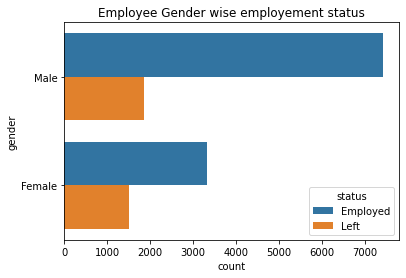

In [38]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(data=employeeRawData_df, y='gender', hue='status')
plt.title('Employee Gender wise employement status')

Text(0.5, 1.0, 'Employee Marital Status wise employement status')

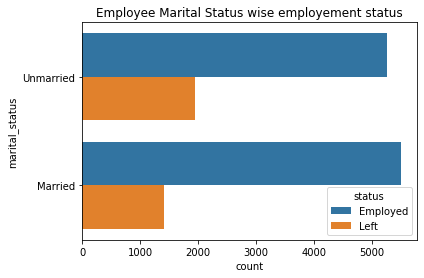

In [39]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(data=employeeRawData_df, y='marital_status', hue='status')
plt.title('Employee Marital Status wise employement status')

<a name = Section512></a>
#### **5.1.2. AgeCategory-wise divisions**

In [40]:
employeeRawData_df=employeeRawData_df[employeeRawData_df['employee_id']!=0]
employeeRawData_df['Age Category'] = employeeRawData_df.apply(age_group_function1,axis=1)

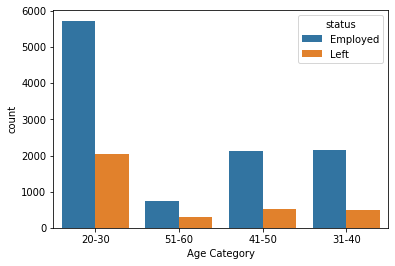

In [41]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(data=employeeRawData_df, x='Age Category', hue='status')

---
<a name = Section52></a>
### **5.2. Department-wise plots**
---

Text(0.5, 1.0, 'Department')

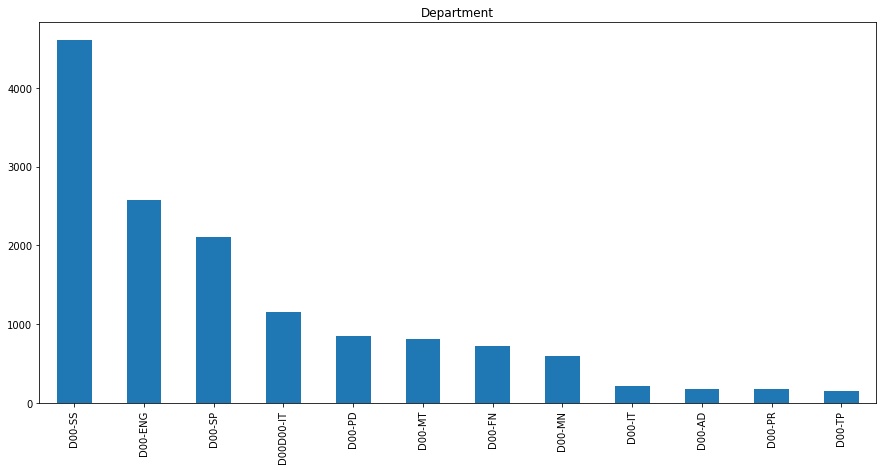

In [42]:
employeeRawData_df['department'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title('Department')

Text(0.5, 1.0, 'Employee department wise employement status')

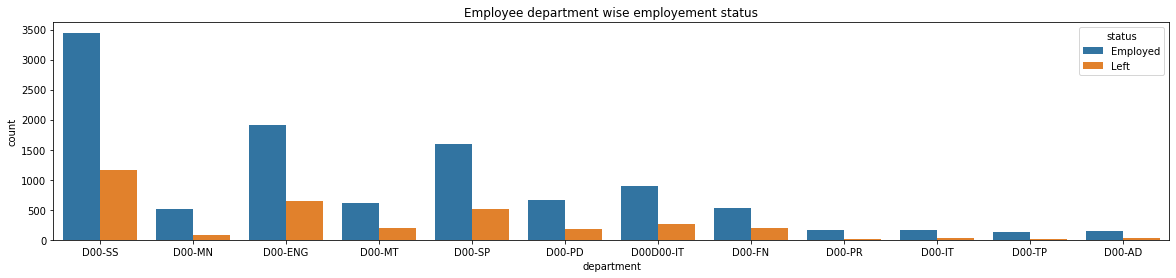

In [43]:
fig,ax= plt.subplots(figsize=(20, 4))
sns.countplot(data=employeeRawData_df, x='department', hue='status')
plt.title('Employee department wise employement status')

---
<a name = Section6></a>
# **6. Post Data Processing & Feature Engineering**
---

In [44]:
## INIT
## MAKE A COPY (to retain the original dataset)
employeeData_df = employeeRawData_df.copy()

In [45]:
display(employeeRawData_df.head())
display(employeeData_df.head())

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,tenure,status,Age Category
0,100101,26,Male,Unmarried,156.00000,D00-SS,0.59911,2,low,0.56510,2.00000,Employed,20-30
1,100102,25,Female,Unmarried,172.00000,D00-MN,0.75420,3,high,0.48622,10.00000,Employed,20-30
2,100103,24,Male,Unmarried,268.00000,D00-ENG,0.68237,3,low,0.61252,2.00000,Employed,20-30
3,100105,23,Female,Unmarried,192.00000,D00-MT,0.75971,3,low,0.61564,3.00000,Employed,20-30
4,100106,29,Male,Unmarried,145.00000,D00-ENG,0.51711,2,low,0.51768,3.00000,Left,20-30


,employee_id,age,gender,marital_status,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,tenure,status,Age Category
0,100101,26,Male,Unmarried,156.00000,D00-SS,0.59911,2,low,0.56510,2.00000,Employed,20-30
1,100102,25,Female,Unmarried,172.00000,D00-MN,0.75420,3,high,0.48622,10.00000,Employed,20-30
2,100103,24,Male,Unmarried,268.00000,D00-ENG,0.68237,3,low,0.61252,2.00000,Employed,20-30
3,100105,23,Female,Unmarried,192.00000,D00-MT,0.75971,3,low,0.61564,3.00000,Employed,20-30
4,100106,29,Male,Unmarried,145.00000,D00-ENG,0.51711,2,low,0.51768,3.00000,Left,20-30


---
<a name = Section61></a>
### **6.1. Drop unnecessary cols such as 'employee_id'**
---

Because it is highly cardinal, and semantically makes no sense, other than ID-ing the employee

In [46]:
#employeeData_df.drop(columns=['employee_id'], inplace=True)


---
<a name = Section62></a>
### **6.2. Potential Features**
---

Here I am using a custom notation <-> to denote correlation

***The following was obtained from the Pre-Processing Report***


**Target variable: status**

*   status <-> n_projects, avg_monthly_hrs, satisfaction


**Other Correlations, and possible chances of Multicollinearity**

*   age <-> n_projects, marital_status
*   n_projects <-> age, marital_status, satisfaction, avg_monthly_hrs, status
*   marital_status <-> age, n_projects, 
*   avg_monthly_hrs <-> n_projects, status
*   satisfaction <-> n_projects, status



**But first, let's check correlations on heatmap, etc**



---
<a name = Section63></a>
### **6.3. Encoding target variable 'status' as 0 or 1 for showing up in Correlation data, such as Heatmaps**
---

In [47]:
def status_encoding_function(x):
    if x['status'] == 'Left':
        return(1)
    
    else:
        return(0)

In [48]:
employeeData_df['StatusEncoded'] = employeeData_df.apply(status_encoding_function,axis=1)

In [49]:
employeeData_df.head(20)

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,tenure,status,Age Category,StatusEncoded
0,100101,26,Male,Unmarried,156.00000,D00-SS,0.59911,2,low,0.56510,2.00000,Employed,20-30,0
1,100102,25,Female,Unmarried,172.00000,D00-MN,0.75420,3,high,0.48622,10.00000,Employed,20-30,0
2,100103,24,Male,Unmarried,268.00000,D00-ENG,0.68237,3,low,0.61252,2.00000,Employed,20-30,0
3,100105,23,Female,Unmarried,192.00000,D00-MT,0.75971,3,low,0.61564,3.00000,Employed,20-30,0
4,100106,29,Male,Unmarried,145.00000,D00-ENG,0.51711,2,low,0.51768,3.00000,Left,20-30,1
5,100107,52,Male,Married,178.00000,D00-ENG,0.50099,6,low,0.36529,2.00000,Employed,51-60,0
6,100108,24,Male,Unmarried,184.00000,D00-ENG,0.81548,3,medium,0.92436,3.00000,Employed,20-30,0
7,100109,24,Male,Unmarried,177.00000,D00-MT,0.46149,3,high,0.35017,3.00000,Employed,20-30,0
8,100110,25,Male,Unmarried,235.00000,D00-ENG,0.94640,3,medium,0.60879,2.00000,Employed,20-30,0
9,100111,22,Male,Unmarried,138.00000,D00-ENG,0.48929,2,low,0.36978,3.00000,Left,20-30,1


In [50]:
## Get only the numeric features first: 'age', 'n_projects', 'avg_monthly_hrs', 'satisfaction', 'StatusEncoded'
## and o/p Target variable, 'StatusEncoded'

employeeData_Numeric_df = employeeData_df[['age', 'n_projects', 'avg_monthly_hrs', 'satisfaction', 'StatusEncoded']]
employeeData_Numeric_df.head()

,age,n_projects,avg_monthly_hrs,satisfaction,StatusEncoded
0,26,2,156.00000,0.56510,0
1,25,3,172.00000,0.48622,0
2,24,3,268.00000,0.61252,0
3,23,3,192.00000,0.61564,0
4,29,2,145.00000,0.51768,1


<a name = Section631></a>
#### **6.3.1. Heatmap (numeric variables)**


Text(0.5, 1.0, 'Correlation between features')

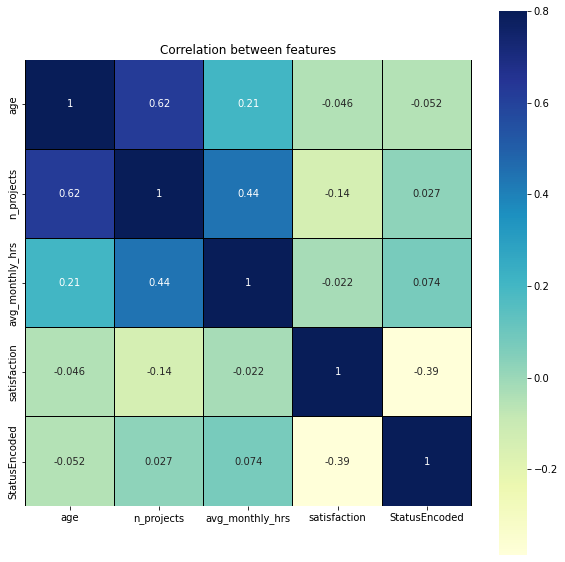

In [51]:
corr = employeeData_Numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observations:**


We can see that there is a decently strong positive correlation between **age**, and **no. of projects**

Let's draw pairwise plots to get a better understanding


<a name = Section632></a>
#### **6.3.2. Pair-wise Plots (numeric variables)**

Text(0.5, 1.0, 'Pair Plot')

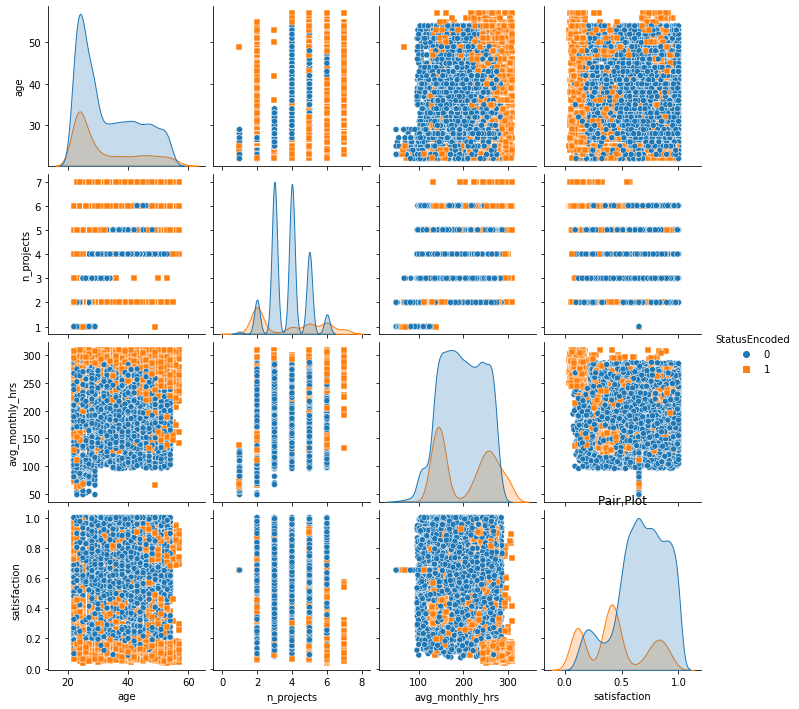

In [52]:
sns.pairplot(employeeData_Numeric_df[['age', 'n_projects', 'avg_monthly_hrs', 'satisfaction', 'StatusEncoded']],
             vars = ['age', 'n_projects', 'avg_monthly_hrs', 'satisfaction'],
             hue="StatusEncoded", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

<a name = Section633></a>
#### **6.3.3. Very Interesting Insights (numeric variables)**








**Legends:**
(StatusEncoded)
0 => Employed
1 => Left

If we check the diagonal plots, we'll see:

*   More employees among those with higher satisfaction score (> 0.5) have stayed, instead of leaving

*   Most employees with median average monthly hours of around 200, have stayed than left. The attrition increases with too less hours, or too much hours (probably overworked)

*   More people left when no. of projects <=2, or >=6. That is too less, or too more

*   In the age group of 20-40, there has been both high attrition and retention. One possibility maybe, people changing jobs (for the attrition) in their younger years. Or staying back during the formative years of their careers


Other Observations from the other plots:
age-vs-no of projects

*   Irrespective of the age, among the employees having >=7 projects, most have left.
*   Same goes for too less projects. Such as only 2 projects.
*   Interestingly, those with 1 projects, most have stayed




---
<a name = Section64></a>
### **6.4. One-Hot Encoding Categorical variables such as gender, marital_status, etc.**
---

In [53]:
employeeData_df = pd.get_dummies(employeeData_df, columns=['gender','marital_status', 'department', 'salary', 'Age Category'], drop_first=False)

In [54]:
employeeData_df.head()

,employee_id,age,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,status,StatusEncoded,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_D00D00-IT,salary_high,salary_low,salary_medium,Age Category_20-30,Age Category_31-40,Age Category_41-50,Age Category_51-60
0,100101,26,156.00000,0.59911,2,0.56510,2.00000,Employed,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,100102,25,172.00000,0.75420,3,0.48622,10.00000,Employed,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,100103,24,268.00000,0.68237,3,0.61252,2.00000,Employed,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,100105,23,192.00000,0.75971,3,0.61564,3.00000,Employed,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,100106,29,145.00000,0.51711,2,0.51768,3.00000,Left,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


---
<a name = Section65></a>
### **6.5. Dropping older 'status', renaming 'StatusEncoded' to 'status'**
---

The older 'status' was a categorical variable.
The newer one is numeric.
1 => Left
0 => Employed

In [55]:
employeeData_df.drop(columns=['status'], inplace=True)
employeeData_df.rename(columns = {'StatusEncoded':'status'}, inplace = True)

employeeData_df.head()

,employee_id,age,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,status,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_D00D00-IT,salary_high,salary_low,salary_medium,Age Category_20-30,Age Category_31-40,Age Category_41-50,Age Category_51-60
0,100101,26,156.00000,0.59911,2,0.56510,2.00000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,100102,25,172.00000,0.75420,3,0.48622,10.00000,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,100103,24,268.00000,0.68237,3,0.61252,2.00000,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,100105,23,192.00000,0.75971,3,0.61564,3.00000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,100106,29,145.00000,0.51711,2,0.51768,3.00000,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


---
<a name = Section7></a>
# **7. Data Preparation (before model creation)**
---

<a name = Section71></a>
### **7.1 Scaling (of numeric variables)**

**Scaling the data**

- We will use **RobustScalar** to **scale *'amount'* and *'time'* features** of our data.

- __RobustScalar__ is similar to normalization but it instead **uses the interquartile range, so that it is robust to outliers**.

- Please refer to the link of RobustScalar - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [56]:
targetVariable = 'status'

# Data Standardization over the INPUT FEATURES: Scale the data
#--------------------------------------------------------------------

# Saving all (now Numeric) feature names to a list in a variable
dataColumns = employeeData_df.columns.to_list()

# Removing o/p feature as it is our target
dataColumns.remove(targetVariable)

# Scaler object creation
encoder = RobustScaler()

# Scaling / Normalizing
for i in dataColumns:
   employeeData_df[i] = encoder.fit_transform(employeeData_df[[i]])


<a name = Section72></a>
### **7.2 X and y creation**

In [57]:
# Get X and y
#---------------------

X = employeeData_df.drop(targetVariable, axis = 1)
y = employeeData_df[targetVariable]

display(X.head())
display(X.shape)
display(y.shape)


,employee_id,age,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,tenure,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_D00D00-IT,salary_high,salary_low,salary_medium,Age Category_20-30,Age Category_31-40,Age Category_41-50,Age Category_51-60
0,-1.02856,-0.17647,-0.47778,-0.42985,-1.00000,-0.23626,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,-1.02847,-0.23529,-0.30000,0.12937,-0.50000,-0.44937,7.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,-1.02837,-0.29412,0.76667,-0.12965,-0.50000,-0.10813,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,-1.02819,-0.35294,-0.07778,0.14924,-0.50000,-0.09971,0.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,-1.02810,0.00000,-0.60000,-0.72551,-1.00000,-0.36437,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


(14116, 30)

(14116,)

<a name = Section73></a>
### **7.3 Train-Test Split (TTS)**

In [58]:
 # TTS
 #------

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# 80-20 train-test split
# default test_size=0.25
# random_state=seedvalue --> Setting this to a const int => You'll get the same shuffle everytime you run it


<a name = Section74></a>
### **7.4 FEATURE IMPORTANCES (using Random Forest (RF) Classifier)**

In [59]:

# Get Feature Importance using Random Forest
# This interpretability is derived from the importance of each feature on the tree decision evaluated on the reduction in impurity.
#-------------------------------

### Random Forest Classifier ###

# -- USE RandomForestClassifier for CLASSIFICATION---

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Train the model on training data
rf = RandomForestClassifier(n_estimators = 100, random_state = 42) # Ideally / by default no of estimators is 100
rf.fit(X_train, y_train);


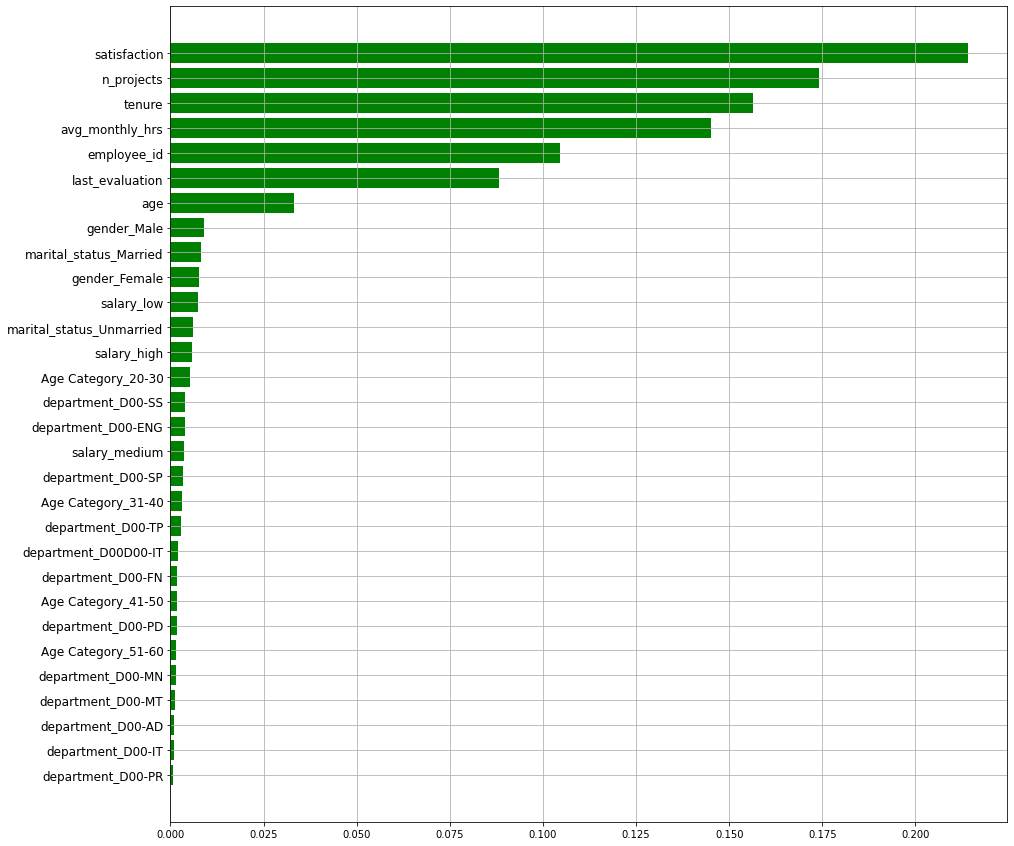

In [60]:

# ---- FEATURE IMPORTANCES ---

features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 15])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()


<a name = Section75></a>
### **7.5 FEATURE IMPORTANCES (using Random Forest (RF) Classifier)**

Thus, we'll choose the following features for model creation:

*   statisfaction
*   n_projects
*   tenure
*   avg_monthly_hrs



In [61]:
features = ['satisfaction', 'n_projects', 'tenure', 'avg_monthly_hrs']

<a name = Section76></a>
### **7.6 X, y Creation and TTS, Again, after choosing the FEATURES based upon Feature Importances**

In [62]:
# Get X and y
#---------------------

X = X[features]
y = employeeData_df[targetVariable]

display(X.head())
display(X.shape)
display(y.shape)


# TTS
#------

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# 80-20 train-test split
# default test_size=0.25
# random_state=seedvalue --> Setting this to a const int => You'll get the same shuffle everytime you run it


,satisfaction,n_projects,tenure,avg_monthly_hrs
0,-0.23626,-1.00000,-1.00000,-0.47778
1,-0.44937,-0.50000,7.00000,-0.30000
2,-0.10813,-0.50000,-1.00000,0.76667
3,-0.09971,-0.50000,0.00000,-0.07778
4,-0.36437,-1.00000,0.00000,-0.60000


(14116, 4)

(14116,)

<a name = Section77></a>
### **7.7 Scaling (Fit-Transform for Train, Transform for Test)**

In [63]:
#### SCALING ####

#### FIT_TRANSFORM (X_train) & TRANSFORM (X_test) ####
#### FIT => "Study"/ Learn | TRANSFORM => "Scale/Normalization" ###

# Read about MinMaxScaler, RobustScaler
# ROBUST SCALER because it is LESS PRONE to OUTLIERS

scaler = RobustScaler()

## FIT / TRAIN, and TRANSFORM / SCALE ###

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train[features] = scaler.fit_transform(X_train)

# Transform on X_test
X_test[features] = scaler.transform(X_test)

display("X_train Shape:", X_train.shape)
display("X_test Shape:", X_test.shape)
display("y_train Shape:", y_train.shape)
display("y_test Shape:", y_test.shape)

display("X_train:", X_train.head())
display("X_test", X_test.head())
display("y_train", y_train.head())
display("y_test", y_test.head())

'X_train Shape:'

(11292, 4)

'X_test Shape:'

(2824, 4)

'y_train Shape:'

(11292,)

'y_test Shape:'

(2824,)

'X_train:'

,satisfaction,n_projects,tenure,avg_monthly_hrs
3996,0.33626,-0.50000,0.00000,0.34831
9378,0.02326,0.00000,0.00000,-0.44944
13505,0.18175,0.50000,2.00000,0.48315
3078,0.58319,-0.50000,-1.00000,0.66292
11909,-0.84744,0.50000,2.00000,0.60674


'X_test'

,satisfaction,n_projects,tenure,avg_monthly_hrs
13326,0.52734,0.00000,2.00000,0.33708
6089,0.22320,-0.50000,-1.00000,-0.28090
12989,-0.59117,-1.00000,0.00000,-0.73034
221,-1.04619,-0.50000,2.00000,0.07865
33,0.11765,0.00000,-1.00000,0.59551


'y_train'

3996     0
9378     0
13505    1
3078     0
11909    0
Name: status, dtype: int64

'y_test'

13326    1
6089     0
12989    1
221      0
33       0
Name: status, dtype: int64

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop RandomForest using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Recall score**, also we will check for **Accuracy**, **Precision**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Curve**.



<a name = Section81></a>

## **8.1 Random Forest - Baseline Model**

In [64]:
### Random Forest Classification -- Baseline Model ###

model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

<a name = Section82></a>

## **8.2 Using Trained Model for Prediction**

In [65]:
#predicting on test data
y_pred_test = model.predict(X_test)

### Checking Accuracy

In [66]:
accuracy_rf_baseline = accuracy_score(y_test,y_pred_test)
print('Accuracy score for test data is:', accuracy_rf_baseline)

Accuracy score for test data is: 0.9794617563739377


### Checking Precision Score

In [67]:
precision_rf_baseline = precision_score(y_test,y_pred_test)
print('Precision score for test data is:', precision_rf_baseline)

Precision score for test data is: 0.9703588143525741


### Checking Recall Score

In [68]:
recall_rf_baseline = recall_score(y_test,y_pred_test)
print('Recall score for test data is:', recall_rf_baseline)

Recall score for test data is: 0.9409984871406959


### Checking F1-Score

- The F measure (F1 score or F score) is a **measure of a test’s accuracy** and is defined as **the weighted harmonic mean of the precision and recall of the test**.
- The F score can **provide a more realistic measure of a test’s performance** by **using both precision and recall**. 
- The F score is often **used in information retrieval** for measuring search, **document classification**, and **query classification performance**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/f1.jpg" width="300" height="240" /></center>


In [69]:
f1_rf_baseline = f1_score(y_test,y_pred_test)
print('F1 score for test data is:', f1_rf_baseline)

F1 score for test data is: 0.955453149001536


### Checking ROC-AUC Curve and Precision-Recall Curve

- ROC curve should not be used for **imbalanced data** as that can **interpret wrong result**. *If the model is performing good on the imbalanced data we should use precision-recall curve*.

- Because the **False Positive Rate ( False Positives / False Positives + True Negatives )** does **not drop drastically when the Total Real Negatives is huge**. 

- Whereas **Precision ( True Positives / (True Positives + False Positives) )** is **highly sensitive to False Positives and is not impacted by a large total real negative**.

Text(0.5, 0, 'Recall')

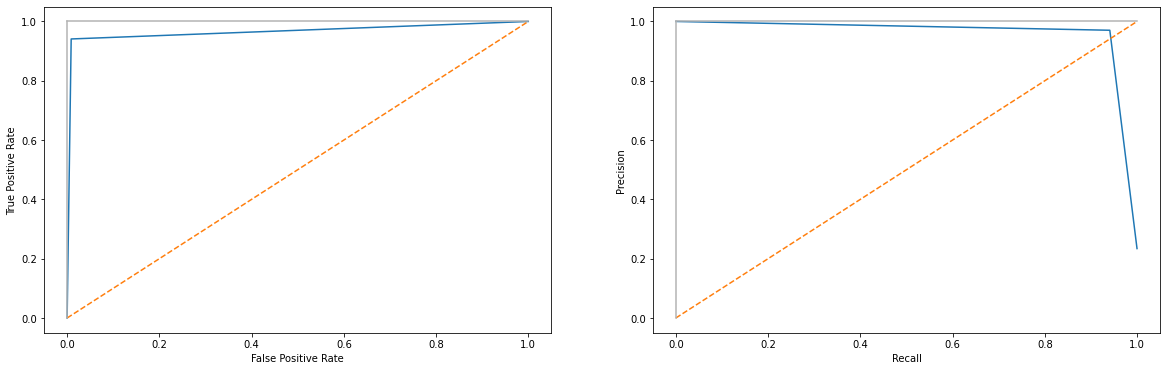

In [70]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

**Observation:**

- We can **observe** a slight difference between **ROC-AUC CURVE** and **Precision-Recall Curve**.
- The **ROC-AUC Curve** on the left, shows **excellent performance**


<a name = Section83></a>

## **8.3 Random Forest with RandomizedSearchCV**

Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
To know more about the different parameters in random forest classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [71]:
# parameters for RandomearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)


In [72]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [3, 5, 7, 11],
                                        'min_samples_split': [2, 4, 7, 9],
                                        'n_estimators': [12, 90, 100, 300,
                                                         700]})

In [73]:
y_pred_test_rf_cv = random_search.predict(X_test)

<a name = Section84></a>

## **8.4 Random Forest with RandomSearchCV Model Evaluation**

### Checking Accuracy

In [74]:
accuracy_rf_tuned = accuracy_score(y_test,y_pred_test_rf_cv)
print('Accuracy score for test data is:', accuracy_rf_tuned)

Accuracy score for test data is: 0.9709631728045326


### Checking Precision

In [75]:
precision_rf_tuned = precision_score(y_test,y_pred_test_rf_cv)
print('Precision score for test data is:', precision_rf_tuned)

Precision score for test data is: 0.9474497681607419


### Checking Recall

In [76]:
recall_rf_tuned = recall_score(y_test,y_pred_test_rf_cv)
print('Recall score for test data is:', recall_rf_tuned)

Recall score for test data is: 0.9273827534039334


### Checking F1-Score

In [77]:
f1_rf_tuned = f1_score(y_test,y_pred_test_rf_cv)
print('F1 score for test data is:', f1_rf_tuned)

F1 score for test data is: 0.9373088685015291


### Checking ROC-AUC Curve and Precision-Recall Curve

Text(0.5, 0, 'Recall')

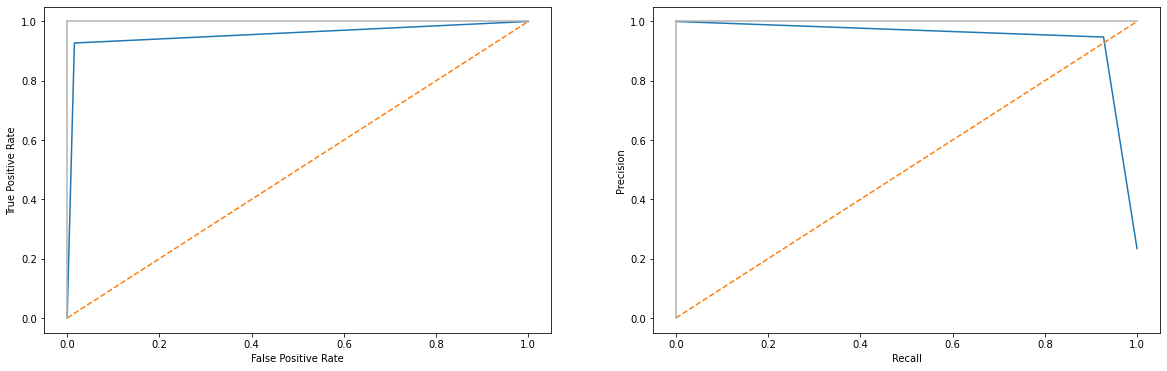

In [78]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test_rf_cv)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test_rf_cv)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

<a name = Section9></a>

---
# **9. Choosing Better Model Based on Prediction**
---

In [82]:
classification_scores_dict = {
    'Baseline Model (RF)': [accuracy_rf_baseline, precision_rf_baseline, recall_rf_baseline, f1_rf_baseline],
    'Tuned Model (RF RSCV)':[accuracy_rf_tuned, precision_rf_tuned, recall_rf_tuned, f1_rf_tuned]}

scores_comparision_df = pd.DataFrame(classification_scores_dict, index=['Accuracy', 'Precision', 'Recall', 'F1'])

scores_comparision_df

,Baseline Model (RF),Tuned Model (RF RSCV)
Accuracy,0.97946,0.97096
Precision,0.97036,0.94745
Recall,0.94100,0.92738
F1,0.95545,0.93731
